In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE

In [5]:
df_water=pd.read_csv('water_potability.csv')
df_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df_water_cleaned=df_water.fillna(df_water.mean())

In [10]:
x=df_water_cleaned[list(df_water_cleaned.columns)[0:-1]]

In [12]:
y=df_water_cleaned['Potability']

In [15]:
sm=SMOTE(random_state=42)
x_res,y_res=sm.fit_resample(x,y)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=101)

Accuracy of Support Vector: 72.75
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       404
           1       0.72      0.74      0.73       396

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800



<Axes: >

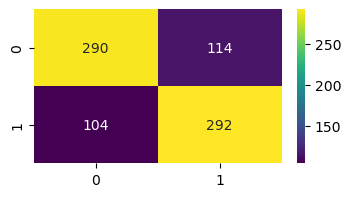

In [19]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy=round(accuracy_score(y_test,pred)*100,2)
print(f'Accuracy of Support Vector: {accuracy}')
print(classification_report(y_test,pred))
plt.figure(figsize=(4,2))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='',cmap='viridis')

In [21]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [23]:
import pickle
# Assuming your model is named `model` — change if it's different
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)